In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
driver = webdriver.Chrome(executable_path = 'C:\\Users\\JOSHITA\\.wdm\\drivers\\chromedriver\\win32\\96.0.4664.45\\chromedriver.exe')
driver.maximize_window()

In [92]:
driver.get('https://www.instagram.com/')

In [93]:
username = 'SAMPLE USERNAME'
password = 'PASSWORD'

In [94]:
wait = WebDriverWait(driver, 10)

In [95]:
def LogIn(username, password):
    
    #finding username box and sending username to it
    user_name= wait.until(EC.presence_of_element_located((By.NAME, "username")))   
    user_name.send_keys(username)
    
    #finding password box and sending password to it
    pass_word= driver.find_element_by_name('password')
    pass_word.send_keys(password)
    
    #submitting/login in
    pass_word.submit()
    
    #closing 2 pop-ups by selecting not now option
    not_now= wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class= "cmbtv"]/button')))
    not_now.click()
    turn_on_notifications= wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class= "mt3GC"]/button[last()]')))
    turn_on_notifications.click()
    

In [96]:
LogIn(username, password)

In [116]:
def search_open(s):
    
    #finding the search box and passing the string
    search= driver.find_element_by_xpath('//div[@class=" QY4Ed"]/input')
    search.send_keys(s)
    
    #clicking the first insta handle that appears
    profile= wait.until(EC.presence_of_element_located((By.CLASS_NAME, '-qQT3')))
    profile.click()
    
    time.sleep(5)

# Problem 1


### top5

In [12]:
top10= ['food_lunatic','foodtalkindia','foodchrome','dilsefoodie','foodie_incarnate',
        'fooditude_delhi','the food community','foodnetwork','fooodiehubb','yourfoodlab']

In [13]:
def top_5_handles(lst):

    #dct contains username with number of followers
    dct = {}
    for i in lst :
        #This fuction will search a user and open that profile
        search_open(i)

        #locating followers of user
        followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
        #replacing ',' with '' and converted into int
        dct[i] = int(followers.get_attribute('title').replace(',' , ''))
        
    #top 5 most followed user
    count = 0
    res = OrderedDict()
    for i in sorted(dct, key=dct.get, reverse=True):
        res[i] = dct[i]
        count += 1
        if(count >= 5) : 
            break
                
    return res

In [14]:
top_handles = top_5_handles(top10)

In [15]:
print('Top 5 instagram handles which have the highest number of followers :')
print()
for uname in top_handles:
    print(uname,'with',top_handles[uname], 'followers')


Top 5 instagram handles which have the highest number of followers :

foodnetwork with 12169000 followers
yourfoodlab with 1843863 followers
dilsefoodie with 944671 followers
foodie_incarnate with 898017 followers
foodtalkindia with 307491 followers


### number of posts done in past 3 days

In [71]:
def count_of_post(day):
    
    #locating first post
    post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0')))
    post.click()
        
    count = 0 
    while True :
        
        #getting date of the the post
        time_tag = wait.until(EC.presence_of_element_located((By.TAG_NAME,'time')))
        
        #getting date in string format
        date_string = time_tag.get_attribute('datetime').split('T')[0]
        
        #converting into date format
        date= datetime.strptime(date_string, "%Y-%m-%d")
        
        #taking differnce between today's date and post posted date
        if (datetime.now() - date).days > day :
            break
        else :
            count += 1
            
        #locating next button
        next_= driver.find_element_by_xpath('//div[starts-with(@class, " l8mY4")]//div')
        next_.click()
        time.sleep(1)

    #closing the post
    close=driver.find_element_by_class_name('qF0y9.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG')
    close.click()
    return count
    

In [78]:
total_post_count = {}
for i in top_handles :
    search_open(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count

In [81]:
print('Number of posts these handles have done in the previous 3 days : -')
print()
for i in total_post_count:
    print(i,'with', total_post_count[i], 'posts')


Number of posts these handles have done in the previous 3 days : -

foodnetwork with 31 posts
yourfoodlab with 4 posts
dilsefoodie with 3 posts
foodie_incarnate with 4 posts
foodtalkindia with 1 posts


### graph

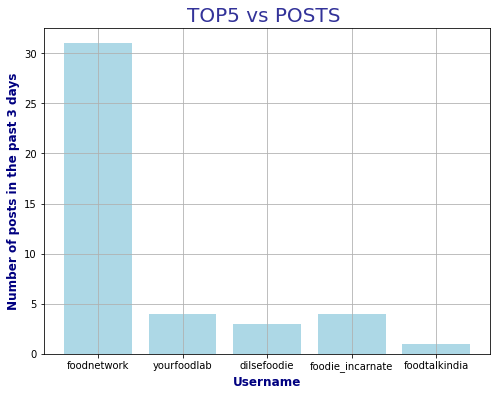

In [98]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()

plt.figure(figsize=(8, 6))
plt.bar(x,y,color='lightblue')
plt.ylabel("Number of posts in the past 3 days",size=12, fontweight='bold',color='navy')
plt.xlabel("Username",size=12,fontweight= 'bold', color='navy')
plt.title('TOP5 vs POSTS ',fontsize=20, color='navy',alpha=0.8)
# plt.xticks(rotation = 45)
plt.grid()


# Problem 2

## Hashtags

In [21]:
def extract_content(lst):
    
    hashtags_list = []
    for user in lst:
        #This fuction will search a user and open that profile
        search_open(user)
        
        #locating the first post of the user
        post1 = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0')))
        post1.click()
            
            
        for post in range(10):
            
            #locating hashtags in the post
            hashtags=driver.find_elements_by_class_name("xil3i")
            
            for hashtag in hashtags:
                #appending in list
                hashtags_list.append(hashtag.text) 
            
            #locating and clicking on next button
            next_= driver.find_element_by_xpath('//div[starts-with(@class, " l8mY4")]//div')
            next_.click()
            time.sleep(2)
                
        #closing the post
        close=driver.find_element_by_class_name('qF0y9.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG')
        close.click()
        time.sleep(2)
        
    return hashtags_list


In [24]:
handles = list(top_handles.keys())
hashtags = extract_content(handles)

In [25]:
print(hashtags)

['#GirlMeetsFarm', '#Black_Gold_platinum', '#HolidayBakingChampionship', '#HolidayCentral', '#discoveryplus', '#HolidayCentral', '#discoveryrise', '#TeamDuff', '#BuddyVsDuff', '#BuddyVsDuff', '#HolidayCentral', '#discoveryplus', '#TeamDuff', '#teamduff', '#SouthernKitchen', '#GiadaEntertains', '#discoveryplus', '#HereForTheHolidays', '#FoodNetworkObsessed', '#recipe', '#foodporn', '#indiancuisine', '#streetfood', '#rice', '#friedrice', '#burntchilligarlicfriedrice', '#promo', '#promovideo', '#homemade', '#ricerecipes', '#sanjyotkeer', '#foodgasm', '#yourfoodlab', '#recipe', '#foodporn', '#indiancuisine', '#streetfood', '#toasties', '#foodphotography', '#promo', '#indianfood', '#yourfoodlab', '#streetfoodindia', '#sanjyotkeer', '#foodie', '#foodgasm', '#foodlover', '#kulchas', '#kulchalover', '#amritsar', '#amritsarikulcha', '#streetfood', '#tipsandtricks', '#foodporn', '#specialchutney', '#specialrecipe', '#chutneyrecipe', '#sanjyotkeer', '#yourfoodlab', '#foodporn', '#recipe', '#foodp

## Frequency

In [26]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])


#foodporn 20
#streetfood 15
#foodtalkindia 12
#sanjyotkeer 10
#yourfoodlab 10
#foodie 10
#dilsefoodie 10
#dilsecouple 10
#indiancuisine 8
#indianfood 8
#recipe 7
#foodgasm 7
#streetfoodindia 7
#foodblogger 7
#foodlover 6
#foodieincarnate 6
#sodelhi 6
#newdelhi 6
#delhigram 6
#foodgram 6
#foodtalk 6
#delhifoodblogger 5
#indianstreetfood 5
#delhifoodie 5
#indianfoodie 5
#desikhana 5
#delhifood 5
#delhi 5
#homemade 4
#foodphotography 4
#Foodieincarnate 4
#Reelitfeelit 4
#reelkarofeelkaro 4
#reelsinstagram 4
#reels 4
#foodpornshare 4
#foodiesofinstagram 4
#delhistreetfood 4
#mumbaistreetfood 4
#indianfoodblogger 4
#indianfoodbloggers 4
#mumbai 4
#HolidayCentral 3
#discoveryplus 3
#promo 3
#amritsar 3
#viralfood 3
#HotFind 3
#discoverhongkong 3
#hk 3
#hongkong 3
#cocktails 3
#drinks 3
#drinking 3
#drink 3
#food 3
#TeamDuff 2
#BuddyVsDuff 2
#toasties 2
#kulchas 2
#kulchalover 2
#amritsarikulcha 2
#tipsandtricks 2
#specialchutney 2
#specialrecipe 2
#chutneyrecipe 2
#eggrecipes 2
#eggcurry 2
#

## making dataframe and csv file

In [43]:
df = pd.DataFrame(dct.items(), columns=['Hashtag','Frequency'])

In [44]:
df= df.sort_values('Frequency', ascending= False)
df

,Hashtag,Frequency
14,#foodporn,20
16,#streetfood,15
80,#foodtalkindia,12
31,#foodie,10
24,#sanjyotkeer,10
...,...,...
1,#Black_Gold_platinum,1
97,#dosa,1
75,#amulbutter,1
74,#butter,1


In [45]:
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('instaBot_words_frequency.csv',index=False)

## most used hashtag

In [46]:
df.iloc[0].Hashtag

'#foodporn'

## pie chart

In [54]:
hashtag_name=[]
count=[]
for i in df['Hashtag'].iloc[0:5]:
    hashtag_name.append(i)

for i in df['Frequency'].iloc[0:5]:
    count.append(i)

Text(0.5, 1.0, 'Top 5 Hashtags used by bloggers ')

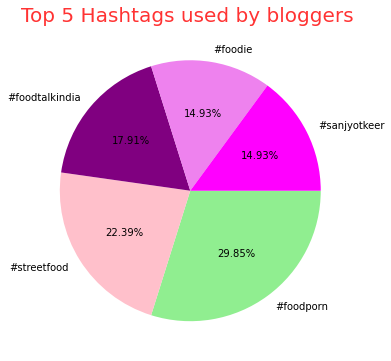

In [127]:
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False, colors=['lightgreen', 'pink','purple','violet','magenta'])
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='red',alpha=0.8)

# Problem 3

## likes on recent 10 posts

In [118]:
def get_likes(user):

    likes = []
    #This fuction will search a user and open that profile
    search_open(user)

    #locating the first post of the user
    post1 = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0')))
    post1.click()
        
    for post in range(10):
                
        try : 
            #for getting like on video we need to first click on view then only we can like
            views = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
            views.click()
            time.sleep(1)
                    
            #locating like and clicking on it
            like = driver.find_element_by_class_name('vJRqr')
            no_of_likes = (like.text).split()[0].replace(',' , '')
            likes.append(int(no_of_likes))
            time.sleep(1)
                    
        #if the post is image then this part will execute 
        except TimeoutException :
            like = driver.find_element_by_xpath('//div[@class= "Nm9Fw"]/a')
            no_of_likes = (like.text).split()[0].replace(',' , '')
            likes.append(int(no_of_likes))
            time.sleep(1)
        
        #locating and clicking on next button
        next_= driver.find_element_by_xpath('//div[starts-with(@class, " l8mY4")]//div')
        next_.click()
        time.sleep(1)
                
    #locating close button and clicking on it
    close=driver.find_element_by_class_name('qF0y9.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG')
    close.click()
    time.sleep(2)
                                

                
    return likes


In [119]:
dct = {}
for user in handles : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()



Number of likes of the top 10 posts of foodnetwork :
627 Likes
3485 Likes
2093 Likes
2438 Likes
3936 Likes
2335 Likes
2114 Likes
1610 Likes
9518 Likes
3519 Likes

Number of likes of the top 10 posts of yourfoodlab :
22183 Likes
7818 Likes
11005 Likes
13084 Likes
69602 Likes
22886 Likes
9662 Likes
21529 Likes
18777 Likes
13214 Likes

Number of likes of the top 10 posts of dilsefoodie :
8601 Likes
4173 Likes
4767 Likes
25602 Likes
10458 Likes
16392 Likes
22880 Likes
2058 Likes
8806 Likes
9254 Likes

Number of likes of the top 10 posts of foodie_incarnate :
18119 Likes
15697 Likes
30552 Likes
42130 Likes
21420 Likes
190409 Likes
34329 Likes
32467 Likes
91123 Likes
19138 Likes

Number of likes of the top 10 posts of foodtalkindia :
143 Likes
166 Likes
811 Likes
208 Likes
278 Likes
97 Likes
108 Likes
137 Likes
1032 Likes
408 Likes



## average likes for a handle.

In [120]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [121]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)


Average likes for each handle are :
foodnetwork : 3167
yourfoodlab : 20976
dilsefoodie : 11299
foodie_incarnate : 49538
foodtalkindia : 338


## average followers:like ratio of each handle

In [122]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [123]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)


Average followers:like ratio of each handle :
foodnetwork : 3842
yourfoodlab : 87
dilsefoodie : 83
foodie_incarnate : 18
foodtalkindia : 909


## bar graphs

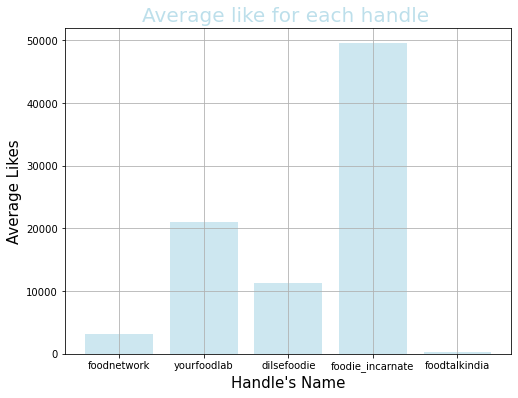

In [125]:
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.figure(figsize=(8, 6))
plt.bar(username,avg_like,color='lightblue',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='lightblue',alpha=0.8)
plt.grid()


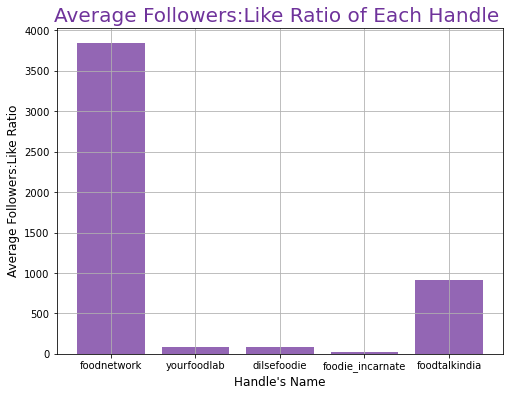

In [128]:
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.figure(figsize=(8, 6))
plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
